# DAWDLE Visualisation

In [1]:
import matplotlib.pyplot as plt
import legwork.visualisation as vis
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns
import visualization as viz
import tqdm
import astropy.units as u
import numpy as np
import pandas as pd

In [2]:
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams['mathtext.default'] = 'regular'

In [3]:
FIRE_path = '~/ceph/FIRE/'
plotdat_path = '/mnt/home/kbreivik/ceph/DWD_alpha_0.25/plot_data/'

In [4]:
obs_sec = 4 * u.yr.to('s')
obs_hz = 1 / obs_sec

met_arr = np.logspace(np.log10(1e-4), np.log10(0.03), 15)
met_arr = np.round(met_arr, 8)
met_arr = np.append(0.0, met_arr)

## FIRE plots:

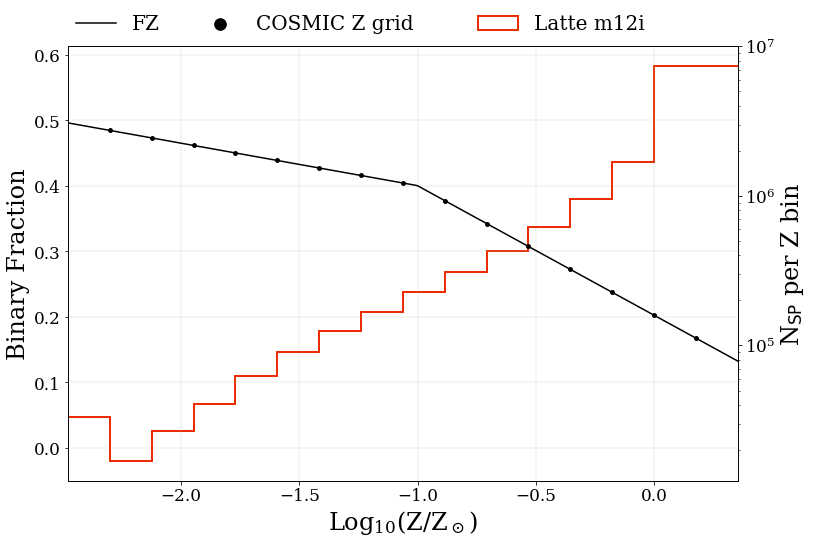

In [7]:
viz.plot_FIRE_F_NSP(FIRE_path, met_arr)

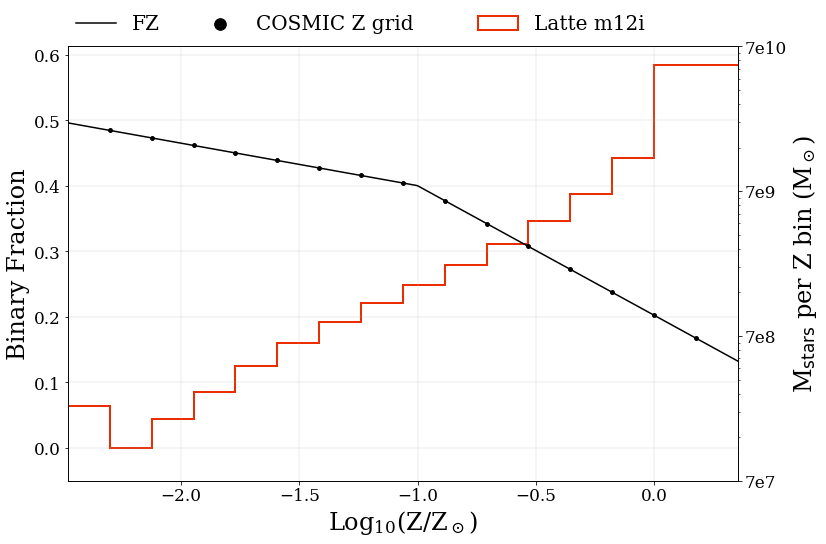

In [8]:
viz.plot_FIRE_F_mass(FIRE_path, met_arr)

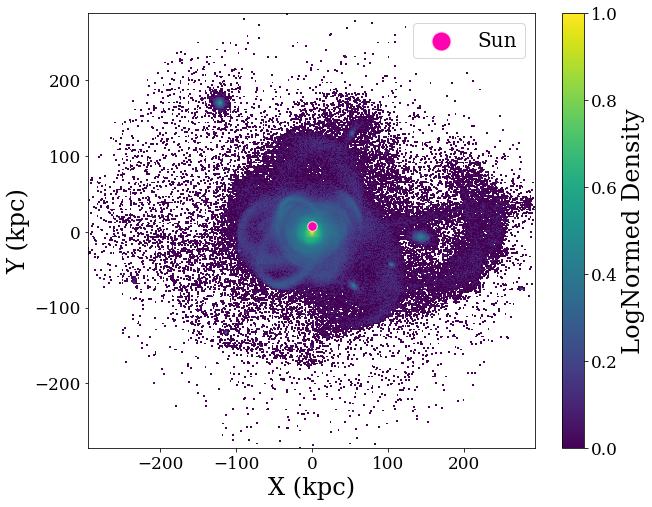

In [9]:
viz.plot_FIREpos(FIRE_path)

## Formation Efficiency:

#### Plot data:

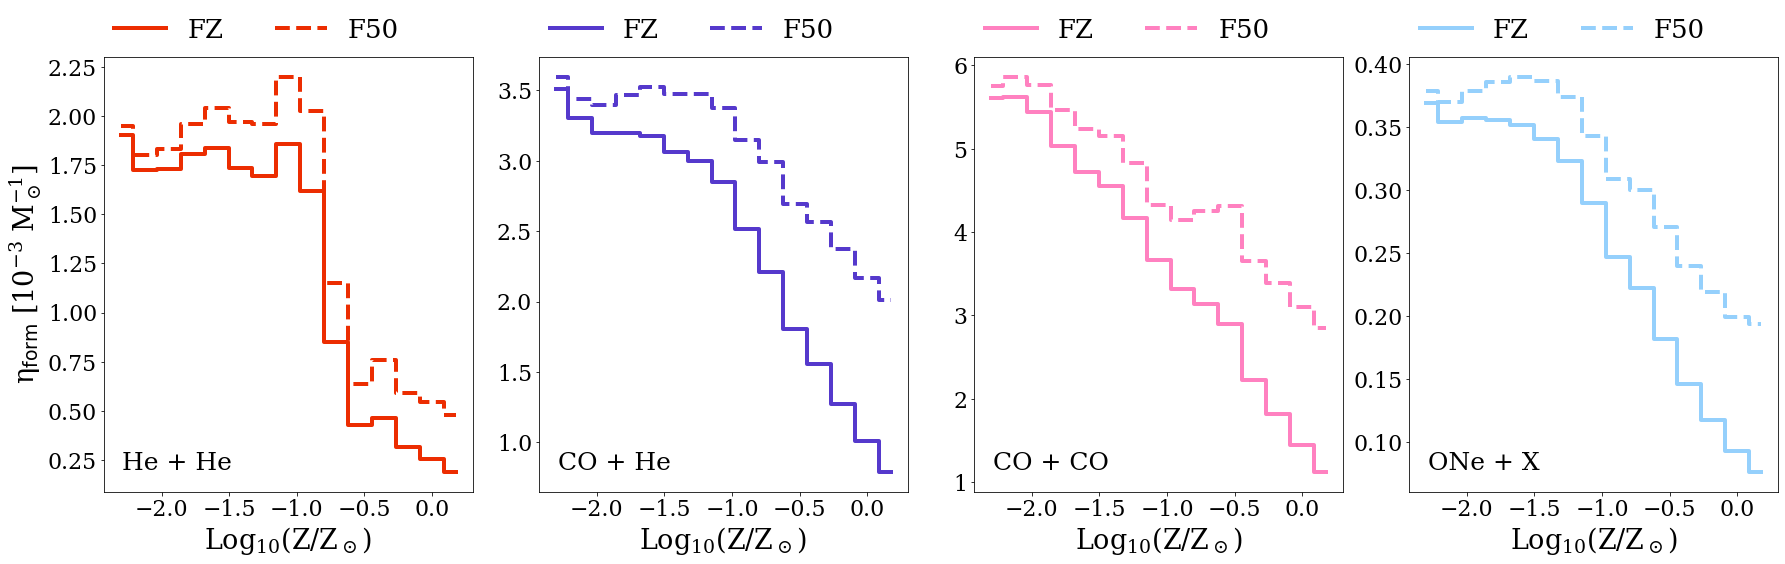

()

In [10]:
DWDeff = pd.read_hdf(plotdat_path + 'DWDeff_FZ.hdf', key='data')
effHe = DWDeff.He.values
effCOHe = DWDeff.COHe.values
effCO = DWDeff.CO.values
effONe = DWDeff.ONe.values

DWDeff05 = pd.read_hdf(plotdat_path + 'DWDeff_F50.hdf', key='data')
effHe05 = DWDeff05.He.values
effCOHe05 = DWDeff05.COHe.values
effCO05 = DWDeff05.CO.values
effONe05 = DWDeff05.ONe.values

viz.plot_formeff(effHe, effHe05, effCOHe, effCOHe05, effCO, effCO05, effONe, effONe05)

## Interaction Separation:

Can plot either first instance of CE or first instance of RLOF by specifying "whichsep". These are usually the same though!

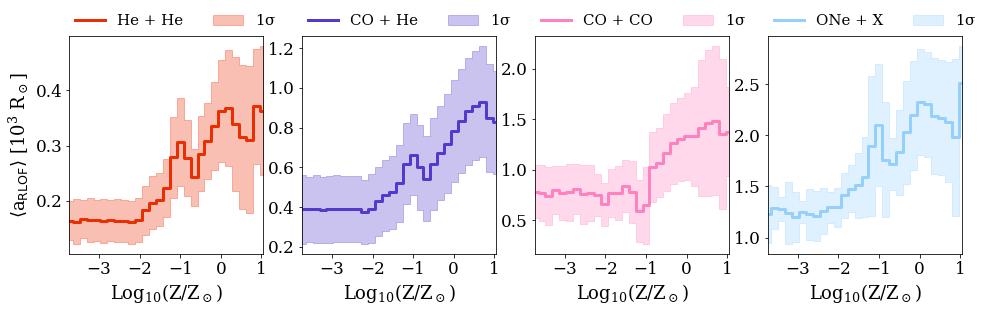

In [11]:
Heinter = pd.read_hdf(plotdat_path+'10_10_intersep_FZ.hdf', key='data')
COHeinter = pd.read_hdf(plotdat_path+'11_10_intersep_FZ.hdf', key='data')
COinter = pd.read_hdf(plotdat_path+'11_11_intersep_FZ.hdf', key='data')
ONeinter = pd.read_hdf(plotdat_path+'12_intersep_FZ.hdf', key='data')

viz.plot_intersep(Heinter, COHeinter, COinter, ONeinter, whichsep='CEsep')

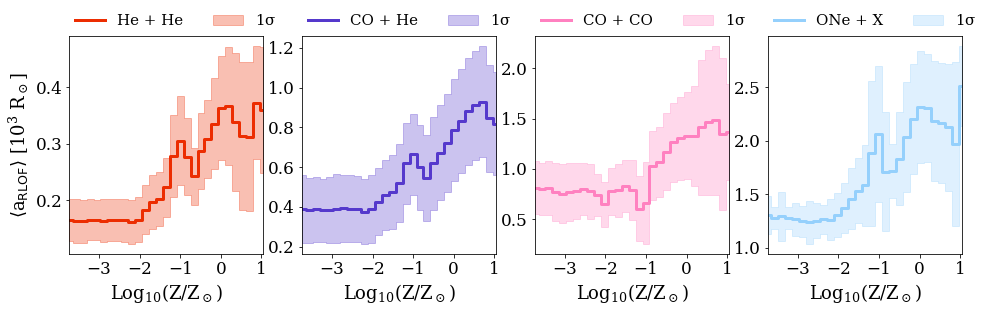

In [12]:
Heinter = pd.read_hdf(plotdat_path+'10_10_intersep_F50.hdf', key='data')
COHeinter = pd.read_hdf(plotdat_path+'11_10_intersep_F50.hdf', key='data')
COinter = pd.read_hdf(plotdat_path+'11_11_intersep_F50.hdf', key='data')
ONeinter = pd.read_hdf(plotdat_path+'12_intersep_F50.hdf', key='data')

viz.plot_intersep(Heinter, COHeinter, COinter, ONeinter, whichsep='CEsep')

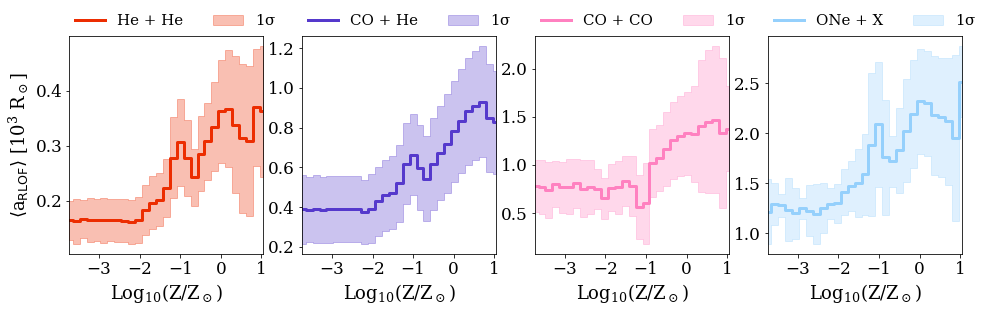

In [13]:
Heinter = pd.read_hdf(plotdat_path+'10_10_intersep_FZ.hdf', key='data')
COHeinter = pd.read_hdf(plotdat_path+'11_10_intersep_FZ.hdf', key='data')
COinter = pd.read_hdf(plotdat_path+'11_11_intersep_FZ.hdf', key='data')
ONeinter = pd.read_hdf(plotdat_path+'12_intersep_FZ.hdf', key='data')

viz.plot_intersep(Heinter, COHeinter, COinter, ONeinter, whichsep='RLOFsep')

## Number of LISA systems:
### Get LISA number data:
#### __(Careful when running next cell!! Will overwrite previous files)__

Once you have the data, it can be plotted:

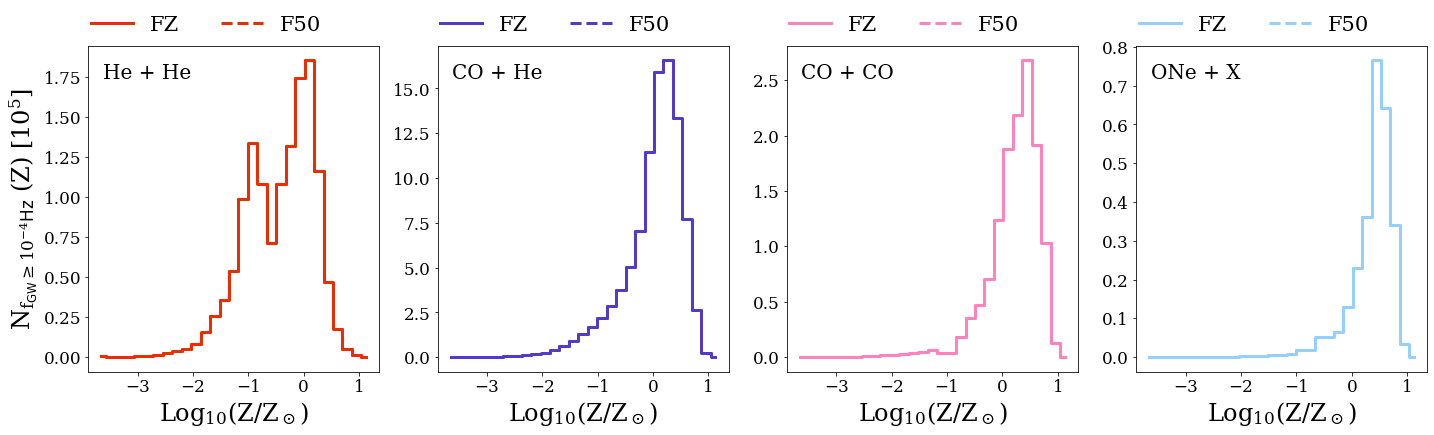

In [14]:
numsFZ = pd.read_hdf(plotdat_path+'numLISA_30bins_FZ.hdf', key='data')
numsF50 = pd.read_hdf(plotdat_path+'numLISA_30bins_F50.hdf', key='data')
viz.make_numLISAplot(numsFZ, numsF50)

# LISA Plots:
#### For LISA plots, you need SNR. The current LISAband data files I sent don't take into account the new sensitivity curve that would be created from the lower number of DWDs. The new creation functions don't include an SNR column, as they will have to be created self-consistently.
## Chirp Mass Grid plot:

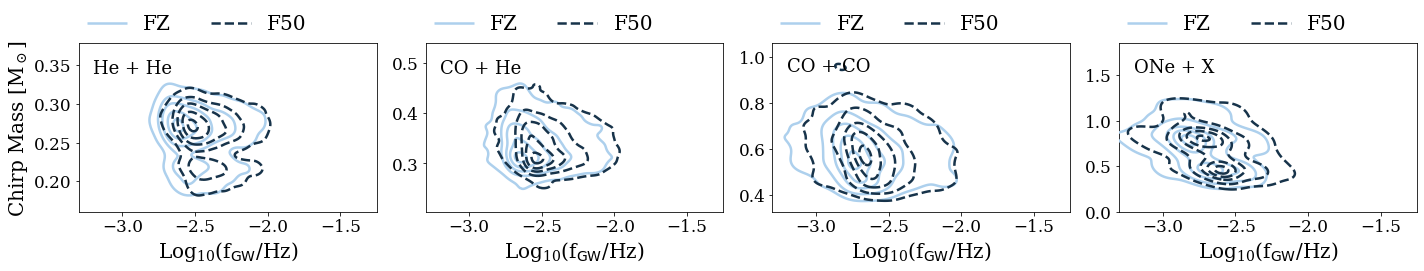

In [5]:
viz.make_Mc_f_gw_plot_total(plotdat_path)

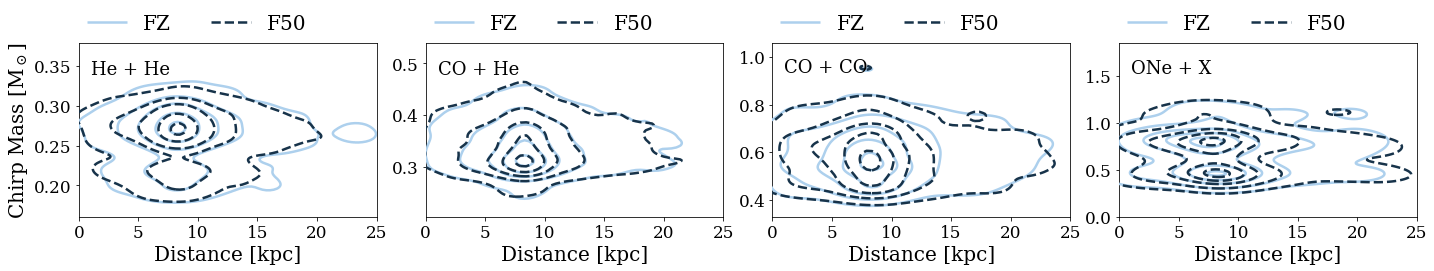

In [6]:
viz.make_Mc_dist_plot_total(plotdat_path)

## SNR plots:
These also require SNR's, so this column can be overwritten with new SNR calculations 

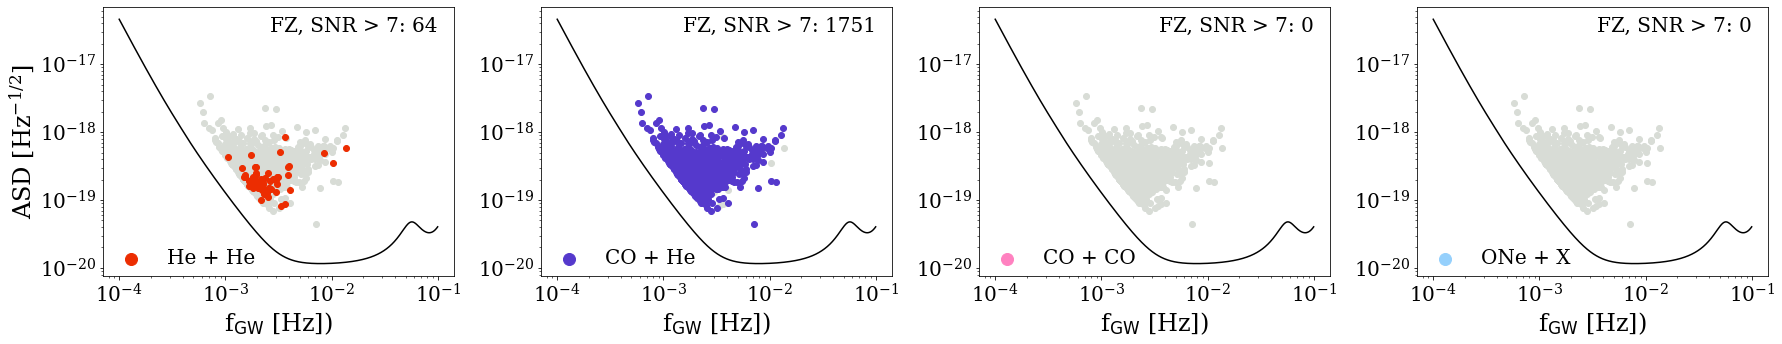

In [30]:
viz.plot_LISAcurves(pathtodat=plotdat_path, model='FZ')

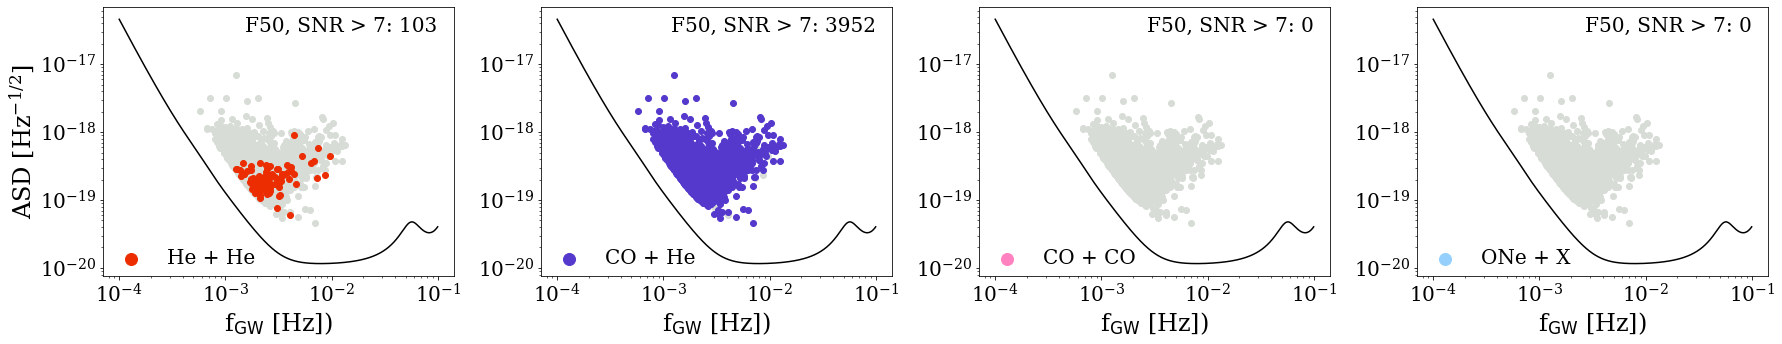

In [31]:
viz.plot_LISAcurves(pathtodat=plotdat_path, model='F50')

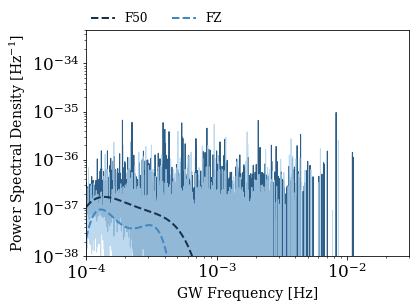

In [32]:
viz.plot_foreground(pathtodat=plotdat_path)

Text(0.5, 0, 'N$_{\\rm{LISA, F50}}$')

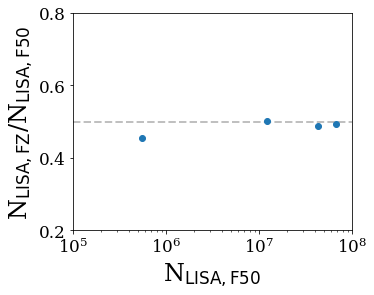

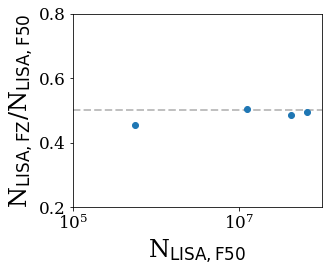

In [6]:
viz.plot_model_var('~/ceph/DWD_')

## Other random plots:

In [ ]:
He = pd.DataFrame()
for f in galaxy_files_10_10_var():
    He = He.append(pd.read_hdf(pathtoLband + f, key='Lband'))

CO = pd.DataFrame()
for f in galaxy_files_11_11_var():
    CO = CO.append(pd.read_hdf(pathtoLband + f, key='Lband'))

COHe = pd.DataFrame()
for f in galaxy_files_11_10_var():
    COHe = COHe.append(pd.read_hdf(pathtoLband + f, key='Lband'))

ONe = pd.DataFrame()
for f in galaxy_files_12_var():
    ONe = ONe.append(pd.read_hdf(pathtoLband + f, key='Lband'))
Xall = He.xGx
Xall = Xall.append(COHe.xGx)
Xall = Xall.append(CO.xGx)
Xall = Xall.append(ONe.xGx)
Yall = He.yGx
Yall = Yall.append(COHe.yGx)
Yall = Yall.append(CO.yGx)
Yall = Yall.append(ONe.yGx)
Zall = He.zGx
Zall = Zall.append(COHe.zGx)
Zall = Zall.append(CO.zGx)
Zall = Zall.append(ONe.zGx)

In [ ]:
X = He.loc[He.snr>7].xGx
X = X.append(COHe.loc[COHe.snr>7].xGx)
X = X.append(CO.loc[CO.snr>7].xGx)
X = X.append(ONe.loc[ONe.snr>7].xGx)
Y = He.loc[He.snr>7].yGx
Y = Y.append(COHe.loc[COHe.snr>7].yGx)
Y = Y.append(CO.loc[CO.snr>7].yGx)
Y = Y.append(ONe.loc[ONe.snr>7].yGx)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
flag = (np.abs(Xall)<200)&(np.abs(Yall)<200)

h, xbinx, ybinx, img = ax.hist2d(X, Y, bins=100, norm=col.LogNorm(), cmap='magma', label='SNR > 7')
cb = fig.colorbar(img)
cb.ax.set_ylabel(r'N$_{\rm{DWD}}$ per bin, LISA systems SNR > 7', fontsize=18)
h, xbinx, ybinx, _ = plt.hist2d(Xall[flag], Yall[flag], norm=col.LogNorm(), bins=300, 
                                cmap='Greys', zorder=0);
#plt.colorbar()
plt.scatter(0, sun_yGx, edgecolor='xkcd:light blue', facecolor='xkcd:bright blue', s=2, label='Sun')
plt.scatter(0, sun_yGx, facecolor='xkcd:bright blue', s=90)
#cb.ax.set_ylabel('LogNormed Density')
plt.legend(fontsize=20, markerscale=10)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.xlim(-200, 200)
plt.ylim(-200, 200)

In [ ]:
import legwork.visualisation as vis
alldata = He.append(COHe.append(CO.append(ONe)))
alldata = alldata.loc[(alldata.snr >=7)&(alldata.fdot>=obs_hz**2)]

avgs = []
bins = np.logspace(np.log10(alldata.met.min()), np.log10(alldata.met.max()), 30)
for i in range(len(bins)-1):
    metlow = bins[i]
    methigh = bins[i+1]
    chunk = alldata.loc[(alldata.met>=metlow)&(alldata.met<=methigh)]
    if len(chunk) <= 1:
        avgs.append(0)
        continue
    Zh = np.abs(chunk.Z.values)
    avg = np.mean(Zh)
    avgs.append(avg)
avgs = np.array(avgs)

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(np.log10(alldata.met), np.abs(alldata.Z.values), s=20, c=alldata.age, label='f$_b$(Z)')
plt.plot(np.log10(bins[1:][avgs>0]), avgs[avgs>0], color='k', lw=2.5, ls='--', label=r'$\overline{|Z_h|}$')
#plt.plot(np.log10(bins[1:]), avgs_05, color='xkcd:royal blue', lw=2, ls='-', label=r'$\overline{|Z_h|}$, f$_b$ = 0.5')
plt.xlabel('Log$_{10}$(Metallicity/Z$_\odot$)')
plt.ylabel('Disk height |Z$_h$| (kpc)')
cb = plt.colorbar(label='Time since ZAMS (Gyr)')
plt.legend()
plt.ylim(-0.3, 20)